# Logistic Regression

**Logistic Regression** is a statistical method used for binary classification. This means it is used to predict the probability that a given input belongs to one of two possible classes. Unlike linear regression, which predicts a continuous outcome, logistic regression predicts a binary outcome (0 or 1, true or false, yes or no).

Here are the key concepts and steps involved in logistic regression:

### 1. **Logistic Function (Sigmoid Function)**
Logistic regression uses the logistic function, also known as the sigmoid function, to model the probability of the default class. The logistic function is defined as:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

where $\sigma(z)$ outputs a value between 0 and 1, which can be interpreted as a probability. The input $ z $ is a linear combination of the input features.

### 2. **Linear Combination of Inputs**
The input $z$ to the logistic function is a linear combination of the input features. It is given by:

$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

where $\beta_0$ is the intercept, $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients, and $x_1, x_2, \ldots, x_n$ are the input features.

### 3. **Logistic Regression Model**
The logistic regression model predicts the probability $p$ that the output belongs to the positive class (usually labeled as 1). This probability is given by:

$p = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

### 4. **Decision Boundary**
To make a classification decision, we choose a threshold (commonly 0.5). If the predicted probability $p$ is greater than or equal to the threshold, the instance is classified as the positive class (1); otherwise, it is classified as the negative class (0).

### 5. **Cost Function**
The cost function used in logistic regression is the log-loss (also known as the binary cross-entropy). It is defined as:

$J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$

where $m$ is the number of training examples, $y_i$ is the actual label, and $\hat{y}_i$ is the predicted probability.

### 6. **Training the Model**
The goal of training the logistic regression model is to find the coefficients $\beta_0, \beta_1, \ldots, \beta_n$ that minimize the cost function. This is typically done using optimization algorithms such as gradient descent.

### 7. **Interpretation of Coefficients**
The coefficients $\beta_1, \beta_2, \ldots, \beta_n$ represent the log-odds change in the probability of the output being 1 for a one-unit change in the corresponding feature, holding all other features constant. Specifically:

$\text{log-odds} = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

### 8. **Advantages and Disadvantages**
**Advantages:**
- Simple to implement and interpret.
- Can handle binary classification problems efficiently.
- Provides probabilities for each prediction, which can be useful in some applications.

**Disadvantages:**
- Assumes a linear relationship between the input features and the log-odds of the outcome.
- Performance can degrade with highly imbalanced datasets.
- Not suitable for complex relationships between features and the outcome (non-linearity).

### Example
Consider a simple example where we want to predict whether a student passes or fails an exam based on their study hours:

1. **Data:** (Study Hours, Pass/Fail)
   - (5, 1)
   - (2, 0)
   - (8, 1)
   - (1, 0)

2. **Model:** $\sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \times \text{Study Hours})}}$

3. **Training:** Using the data to find the best values for $\beta_0$ and $\beta_1$.

4. **Prediction:** For a new student who studies for 3 hours, calculate $z = \beta_0 + \beta_1 \times$, then find $p = \sigma(z)$. If $p \geq 0.5$, predict Pass (1); otherwise, predict Fail (0).

This is a basic overview of logistic regression, a powerful and widely-used technique in binary classification problems.

### Example

Predicting liklihood that a person will purchase a new car based on their Age and Salary.

In [19]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Import Data
data = pd.read_csv('Customer_Data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

### Create the Training and Testing Set from the imported Data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)

# print(X_train) visualize the original data if needed

## Feature Scaling

Feature scaling is a preprocessing step in machine learning and data analysis where the range of independent variables or features is adjusted to ensure they contribute equally to the model. It is important because many machine learning algorithms perform better or converge faster when features are on a similar scale. This is particularly crucial for algorithms that use distance metrics, such as k-nearest neighbors (KNN) and algorithms that involve gradient descent optimization, like logistic regression and neural networks.

Here are the main methods of feature scaling:

### 1. **Standardization (Z-score Normalization)**
Standardization scales the features to have a mean of 0 and a standard deviation of 1. This method is particularly useful when the data has a Gaussian (bell-shaped) distribution. The formula for standardization is:

$z = \frac{x - \mu}{\sigma}$

where:
- $x$ is the original feature value,
- $\mu$ is the mean of the feature values,
- $\sigma$ is the standard deviation of the feature values.

### 2. **Min-Max Scaling (Normalization)**
Min-Max scaling transforms features to a fixed range, usually [0, 1]. This is done by subtracting the minimum value of the feature and dividing by the range of the feature values. The formula is:

$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

where:
- $x$ is the original feature value,
- $\text{min}(x)$ is the minimum value of the feature,
- $\text{max}(x)$ is the maximum value of the feature.

### 3. **Robust Scaling**
Robust scaling uses the median and the interquartile range (IQR) for scaling. This method is less sensitive to outliers. The formula is:

$x' = \frac{x - \text{median}(x)}{\text{IQR}}$

where:
- $\text{median}(x)$ is the median of the feature values,
- $\text{IQR}$ is the interquartile range (the difference between the 75th and 25th percentiles).

### 4. **Scaling to Unit Length**
This method scales the feature vector to have a unit norm (often the L2 norm of 1). It is commonly used in text classification and clustering algorithms. The formula is:

$x' = \frac{x}{||x||}$

where $|x|$ is the norm of the feature vector.

### Why Feature Scaling is Important
1. **Improves Model Performance**: Many machine learning algorithms, especially those that rely on gradient descent, perform better when the features are on a similar scale.
2. **Speeds Up Convergence**: Algorithms like gradient descent converge faster when features are scaled because they provide a more spherical shape of the cost function contour.
3. **Equal Weight**: Without scaling, features with larger ranges can dominate the learning process, leading to biased models.
4. **Distance Metrics**: Algorithms such as KNN, SVM, and clustering algorithms (e.g., k-means) rely on distance metrics and are sensitive to the magnitude of the features.

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test) # Prints the data after feature scaling is applied.

## Train the Logistic Regression Model on the Training Set

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result based on given input

In [24]:
predicted_value = classifier.predict(sc.transform([[30,87000]]))
print(predicted_value)

[0]


## Predicting the Test set results

This will help us compare the Predicted decision with the Real decision

In [25]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


## Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It provides a summary of the prediction results on a classification problem by comparing the actual target values with those predicted by the model. The confusion matrix helps to understand the errors made by the classifier and the types of misclassifications.

### Structure of the Confusion Matrix
For a binary classification problem, the confusion matrix is a 2x2 table:

| Actual \ Predicted | Positive (1) | Negative (0) |
|--------------------|--------------|--------------|
| Positive (1)       | TP           | FN           |
| Negative (0)       | FP           | TN           |

- **True Positive (TP)**: The model correctly predicted the positive class.
- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class (Type I error).
- **False Negative (FN)**: The model incorrectly predicted the negative class (Type II error).

### Key Metrics Derived from the Confusion Matrix
Several important performance metrics can be calculated from the confusion matrix:

1. **Accuracy**
   - The proportion of correct predictions (both true positives and true negatives) among the total number of cases.
   $
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $

2. **Precision (Positive Predictive Value)**
   - The proportion of true positives among all positive predictions.
   $
   \text{Precision} = \frac{TP}{TP + FP}
   $

3. **Recall (Sensitivity or True Positive Rate)**
   - The proportion of true positives among all actual positives.
   $
   \text{Recall} = \frac{TP}{TP + FN}
   $

4. **Specificity (True Negative Rate)**
   - The proportion of true negatives among all actual negatives.
   $
   \text{Specificity} = \frac{TN}{TN + FP}
   $

5. **F1 Score**
   - The harmonic mean of precision and recall, providing a balance between the two.
  $\text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

### Example
Suppose we have a dataset where we want to classify emails as spam or not spam. After training a model and making predictions, we get the following results:

- True Positives (TP): 50 (emails correctly classified as spam)
- True Negatives (TN): 40 (emails correctly classified as not spam)
- False Positives (FP): 10 (emails incorrectly classified as spam)
- False Negatives (FN): 5 (emails incorrectly classified as not spam)

The confusion matrix would look like this:

| Actual \ Predicted | Spam (1) | Not Spam (0) |
|--------------------|----------|--------------|
| Spam (1)           | 50       | 5            |
| Not Spam (0)       | 10       | 40           |

From this confusion matrix, we can calculate:

- **Accuracy**:
  $
  \text{Accuracy} = \frac{50 + 40}{50 + 40 + 10 + 5} = \frac{90}{105} \approx 0.857 (85.7\%)
  $

- **Precision**:
  $
  \text{Precision} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.833 (83.3\%)
  $

- **Recall**:
 $
  \text{Recall} = \frac{50}{50 + 5} = \frac{50}{55} \approx 0.909 (90.9\%)
 $

- **F1 Score**:
  $
  \text{F1 Score} = \frac{2 \cdot 0.833 \cdot 0.909}{0.833 + 0.909} \approx 0.870 (87.0\%)
  $

### Importance of the Confusion Matrix
- **Insight into Model Performance**: Provides a detailed breakdown of correct and incorrect predictions.
- **Identification of Error Types**: Helps identify whether the model is more prone to false positives or false negatives.
- **Evaluation of Metrics Beyond Accuracy**: Metrics like precision, recall, and F1 score are crucial, especially for imbalanced datasets.

The confusion matrix is an essential tool for understanding and evaluating the performance of classification models, especially when accuracy alone is not sufficient to provide a complete picture of the model's effectiveness.

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  1]
 [ 5 17]]


0.925

<ipython-input-33-20a8e0913de6>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'magenta'))(i), label = j)


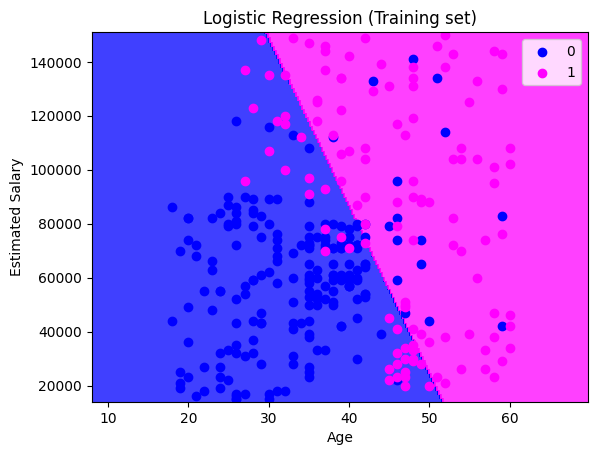

In [33]:
# Visualizing the Training Set Results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
#plt.show()

<ipython-input-34-f1330ba744c0>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'magenta'))(i), label = j)


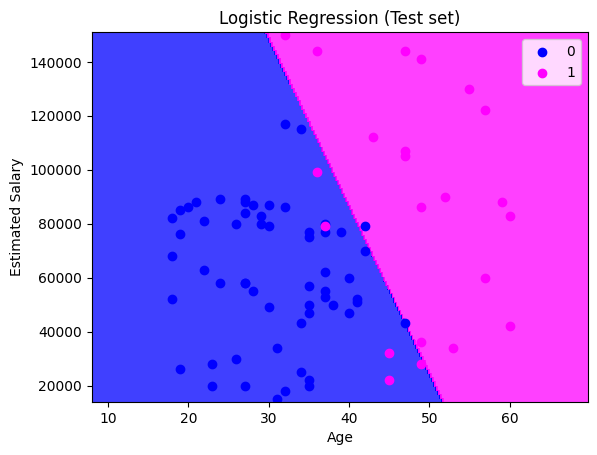

In [34]:
# Visualizing the Test Set Results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'magenta'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

With a few incorrect prediction, the model predicts pretty well.